In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
data=pd.read_csv('Bank.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,266.750000,267.000000,254.899994,255.949997,255.949997,12932516
1,2021-01-12,253.000000,263.100006,249.699997,257.500000,257.500000,14059128
2,2021-01-13,258.350006,263.600006,247.199997,254.399994,254.399994,17572485
3,2021-01-14,256.299988,258.950012,253.050003,254.199997,254.199997,9763818
4,2021-01-15,254.000000,259.750000,251.550003,253.899994,253.899994,13958474


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
117,2021-07-02,210.949997,212.850006,209.500000,210.899994,210.899994,4359443
118,2021-07-05,211.500000,214.149994,211.149994,213.850006,213.850006,4289581
119,2021-07-06,213.850006,214.800003,212.050003,213.350006,213.350006,5626257
120,2021-07-07,214.899994,224.649994,211.649994,223.399994,223.399994,29091948
121,2021-07-08,223.750000,226.399994,215.100006,215.750000,215.750000,14300383


In [5]:
data.shape

(122, 7)

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,220.445082,224.472132,215.465984,219.414344,219.414344,1.465537e+07
std,23.389717,24.161915,22.326368,22.846737,22.846737,6.947874e+06
min,170.000000,177.250000,169.649994,174.550003,174.550003,3.906454e+06
25%,209.075001,211.450005,203.750000,207.587502,207.587502,1.013670e+07
50%,216.099998,219.724998,212.175003,215.849998,215.849998,1.292383e+07
75%,243.425003,248.037502,237.049999,241.787495,241.787495,1.874305e+07
max,266.750000,268.799988,254.899994,258.500000,258.500000,4.180586e+07


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11236\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.985238,0.985767,0.971089,0.971089,0.016250
High,0.985238,1.000000,0.980651,0.987831,0.987831,0.097468
Low,0.985767,0.980651,1.000000,0.986245,0.986245,-0.050936
Close,0.971089,0.987831,0.986245,1.000000,1.000000,0.016251
Adj Close,0.971089,0.987831,0.986245,1.000000,1.000000,0.016251
Volume,0.016250,0.097468,-0.050936,0.016251,0.016251,1.000000


In [10]:
cdf=data[['Open','High','Low','Close']]
cdf.head(9)

,Open,High,Low,Close
0,266.750000,267.000000,254.899994,255.949997
1,253.000000,263.100006,249.699997,257.500000
2,258.350006,263.600006,247.199997,254.399994
3,256.299988,258.950012,253.050003,254.199997
4,254.000000,259.750000,251.550003,253.899994
5,251.750000,253.000000,242.800003,244.399994
6,248.100006,255.050003,245.500000,254.250000
7,256.399994,257.850006,252.000000,253.750000
8,254.250000,265.600006,248.250000,250.550003


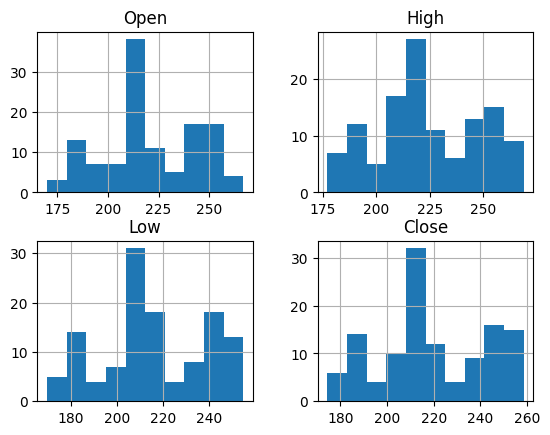

In [11]:
viz=cdf[['Open','High','Low','Close']]
viz.hist()
plt.show()

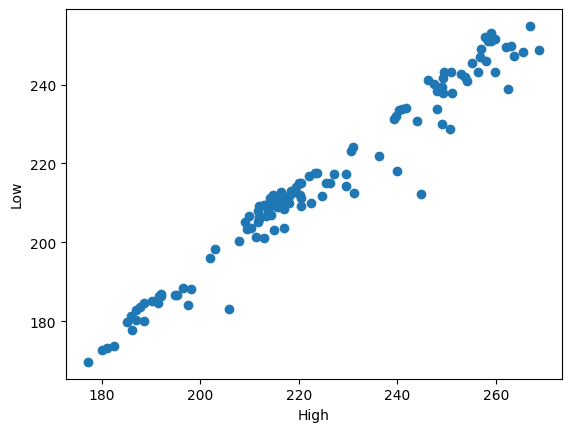

In [12]:
plt.scatter(cdf.High,cdf.Low)
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [13]:
msk=np.random.rand(len(data))<0.8
train=cdf[msk]
test=cdf[~msk]

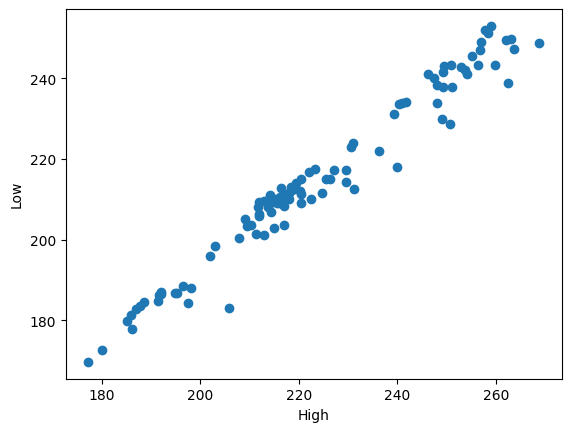

In [14]:
#Train data 
plt.scatter(train.High,train.Low)
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [15]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['High']])
train_y=np.asanyarray(train[['Low']])
regr.fit(train_x,train_y)
print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[0.90567871]]
Intercept:  [12.20292598]


Text(0, 0.5, 'Low')

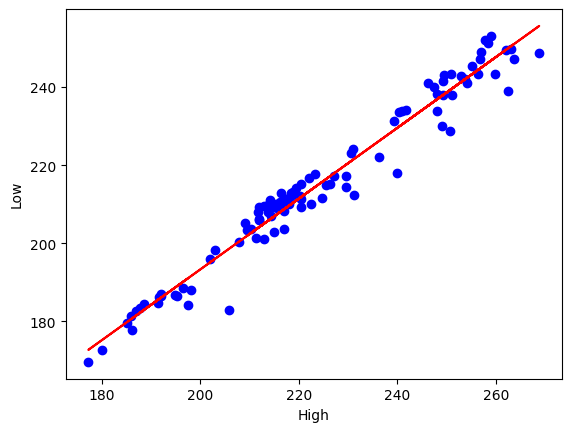

In [16]:
plt.scatter(train.High,train.Low,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel('High')
plt.ylabel('Low')

In [17]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['High']])
test_y=np.asanyarray(test[['Low']])
test_y_=regr.predict(test_x)
print("Mean absolute error: %.2f"%np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)** 2))
print("R2-score: %.2f " % r2_score(test_y_,test_y))

Mean absolute error: 3.53
Residual sum of squares (MSE): 30.89
R2-score: 0.95 
